<a href="https://colab.research.google.com/github/rennanvra/Praktikum-IPSD/blob/main/MODUL%208/Tugas6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

• Hapus kolom target

• Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data! Hasil dari EDA dan pre-processing dapat diinterpretasikan

• Lakukan pemodelan menggunakan algoritma k-means, buat penentuan nilai k dengan membuat diagram elbow, serta simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_K-Means”!

• Lakukan pemodelan menggunakan algoritma db-scan, simpan hasil label dari algoritma db-scan menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_DB-Scan”!

• Buat plot hasil permodelan menggunakan k-means dan db-scan! Interpretasikanlah hasil plot yang didapat!

• Menggunakan matriks evaluasi Silhouette score dan Davies-Bouldin Index, tentukan mana model dengan nilai evaluasi terbaik! Interpretaskanlah hasil matriks evaluasi yang didapat!

In [2]:
# Load Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [35]:
data = pd.read_csv('/content/Dataset-Tugas.csv')
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Hapus kolom target

In [24]:
# Menghapus Kolom Target (class)
data.drop('class', axis=1, inplace=True)
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data! Hasil dari EDA dan pre-processing dapat diinterpretasikan

### Pre-processing

In [25]:
data.shape

(150, 4)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [27]:
# Mengecek missing value
data.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0


In [28]:
# Melihat statistik deskriptif
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
# Normalisasi dan standarisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [30]:
# Konversi kembali ke DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

### EDA

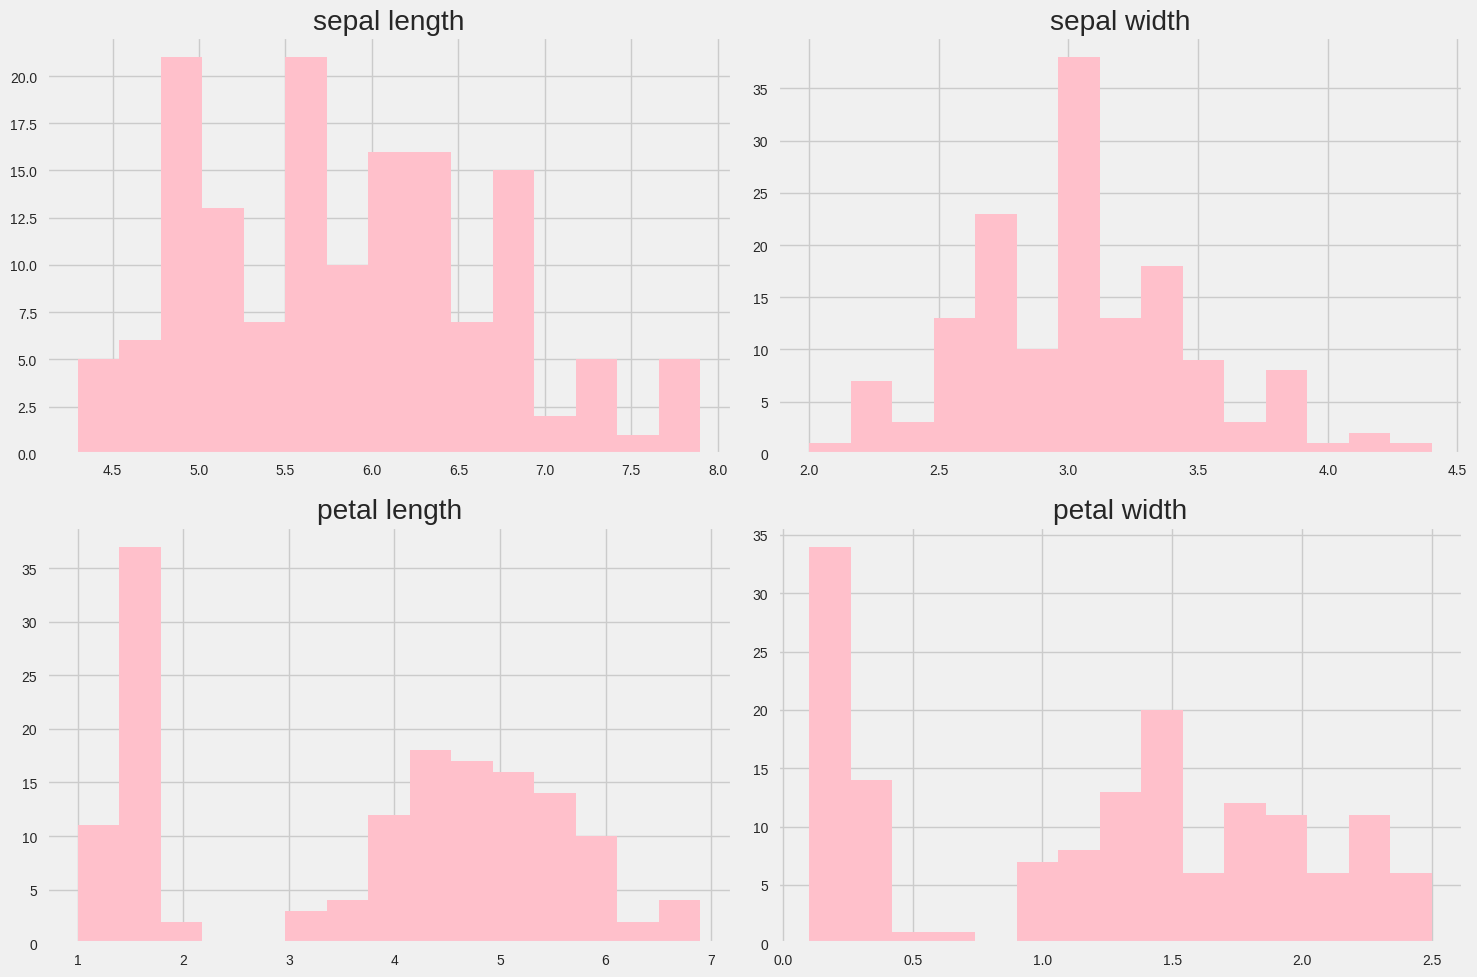

In [31]:
# Visualisasi histogram
data.hist(bins=15, figsize=(15, 10), color='pink')
plt.tight_layout()
plt.show()

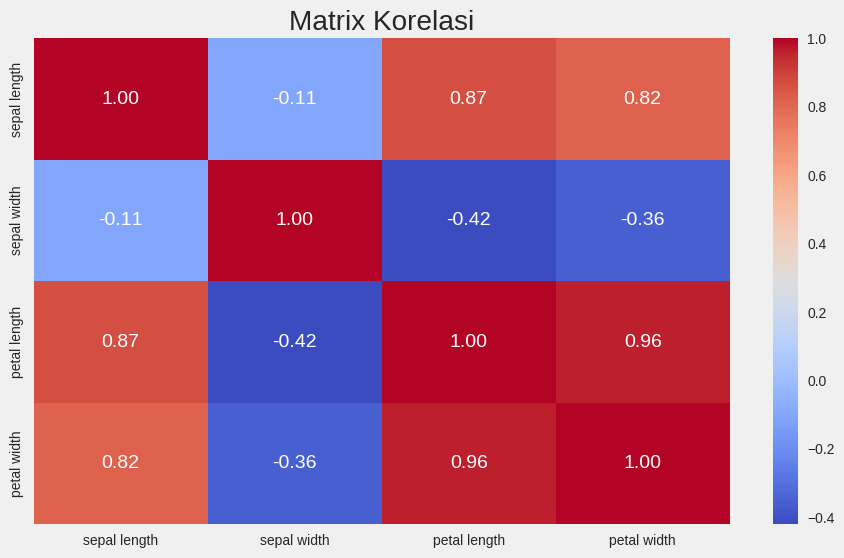

In [32]:
# Menghitung dan memvisualisasikan korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix Korelasi')
plt.show()

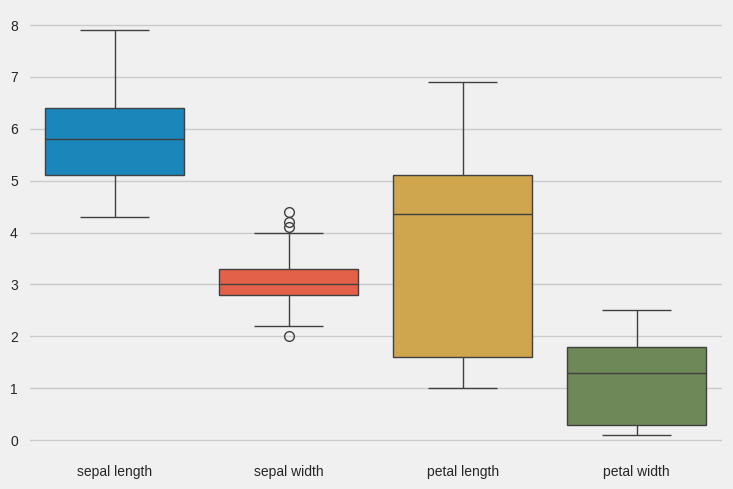

In [33]:
# Menggunakan Box Plot
sns.boxplot(data)
plt.show()

### Interpretasi

Dataset di atas berisi informasi tentang spesies bunga Iris dengan empat variabrl pengukuran (sepal length, sepal width, petal length, petal width) dengan masing-masing 150 baris data. Terdapat informasi tentang nilai minimum, maksimum, rata-rata, dan standar deviasi untuk setiap variabel. Selain itu, terdapat informasi bahwa tidak ada data yang hilang (missng value) dalam dataset.

**Sepal Length:**
- Rentang nilai sepal length berkisar antara 4,5 cm hingga 8,0 cm, dengan nilai maksimal pada 5,0 cm dan nilai minimal pada 7,0 cm dan 7,9 cm.
- Frekuensi interval panjang sepal memiliki nilai maksimal di atas 17,5 cm, dan nilai minimal di bawah 2,5 cm.
- Berdasarkan boxplot, median sepal length berada di sekitar 5,8 cm dengan distribusi yang cukup lebar, menunjukkan variabilitas yang besar dalam ukuran sepal.


**Sepal Width:**
- Rentang nilai sepal width berkisar antara 2,0 cm hingga 4,5 cm, dengan nilai maksimal pada 3,0 cm dan nilai minimal pada 2,0 cm serta 4,0 cm - 4,5 cm.
- Frekuensi interval lebar sepal memiliki nilai maksimal di atas 25 dan nilai minimal di bawah 3.
- Boxplot sepal width menunjukkan median di sekitar 3,5 cm dengan distribusi yang lebih sempit dibandingkan sepal length.


**Petal Length:**
- Rentang nilai petal length berkisar antara 1 cm hingga 7 cm, dengan nilai maksimal pada 1,5 cm dan nilai minimal pada 6,5 cm.
- Frekuensi interval panjang mahkota memiliki nilai maksimal di atas 35 dan nilai minimal di bawah 3.
- Boxplot petal length menunjukkan median di sekitar 4 cm dengan distribusi yang lebih lebar.


**Petal Width:**
- Rentang nilai petal width berkisar antara 0,0 cm hingga 2,5 cm, dengan nilai maksimal di bawah 0,5 cm dan nilai minimal pada 0,5 cm.
- Frekuensi interval lebar mahkota memiliki nilai maksimal di bawah 35 dan nilai minimal di bawah 2.
- Boxplot petal width menunjukkan median di sekitar 1,3 cm dengan distribusi yang juga cukup lebar.

Matriks korelasi menggambarkan hubungan yang kuat di antara variabel-variabel morfologi bunga. Panjang sepal berkorelasi positif kuat (0,87) dengan lebar sepal, begitu juga panjang mahkota yang berkorelasi positif kuat (0,96) dengan lebar mahkota. Namun, panjang sepal berkorelasi negatif (-0,42) dengan panjang mahkota, menunjukkan adanya hubungan terbalik antara ukuran sepal dan ukuran mahkota.

## 3.  Lakukan pemodelan menggunakan algoritma k-means, buat penentuan nilai k dengan membuat diagram elbow, serta simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_K-Means”!

#### K-Means

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
# Scalling
# instantiate
scaler = StandardScaler()

# fit_transform
x_scaled = scaler.fit_transform(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00, -1.22474487e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00, -1.22474487e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00

#### Menentukan nilai k dengan diagram elbow

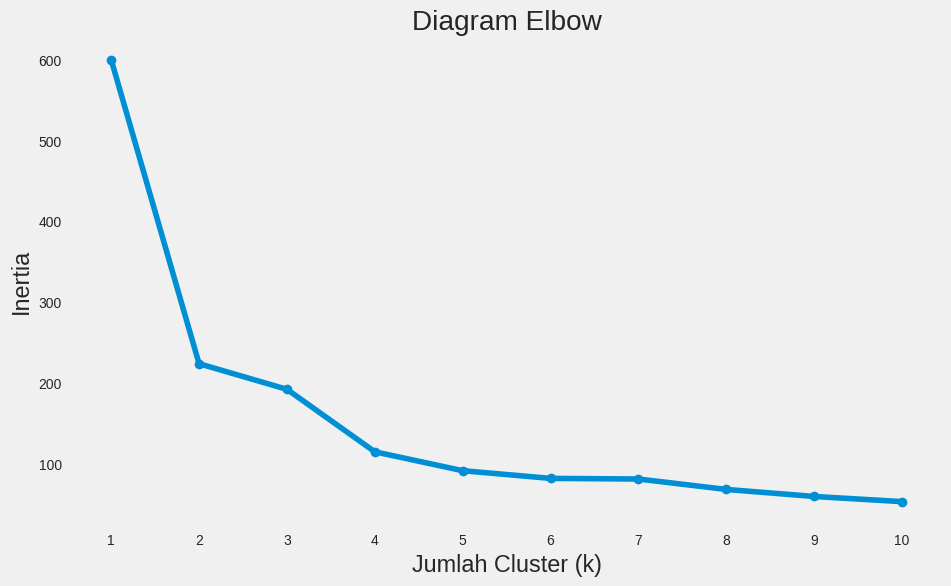

In [41]:
# Edometer untuk mencari data yg sesuai dengan klusternya.
# Menentukan nilai K menggunakan metode elbow
wcss = []

# Mencoba nilai K dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Membuat diagram elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Diagram Elbow')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Dari grafik, terlihat bahwa nilai inersia menurun secara signifikan seiring dengan jumlah cluster yang digunakan hingga mencapai titik siku atau elbow pada saat k = 4, di mana penurunan inersia menjadi lebih landai. Ini menunjukkan bahwa jumlah cluster optimal untuk data ini adalah 4, karena menambah lebih banyak cluster tidak lagi memberikan perbaikan yang signifikan terhadap kualitas cluster.

#### simpan hasil label dari algoritma k-means menjadi kolom baru

In [42]:
# simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut
model1 = KMeans(n_clusters=2, init="k-means++", random_state=42)
y_pred1 = model1.fit_predict(x_scaled)

#### Buat nama kolom menjadi “Label_K-Means”

In [46]:
# buat nama kolom menjadi “Label_K-Means”
data['Label_K-Means'] = y_pred1
data.rename(columns={data.columns[-1]: 'Label_K-Means'}, inplace=True)

# Melihat beberapa baris pertama dengan label K-Means
print(data.head())

   sepal length  sepal width  petal length  petal width  class  Label_K-Means
0           5.1          3.5           1.4          0.2      0              0
1           4.9          3.0           1.4          0.2      0              0
2           4.7          3.2           1.3          0.2      0              0
3           4.6          3.1           1.5          0.2      0              0
4           5.0          3.6           1.4          0.2      0              0


## Lakukan pemodelan menggunakan algoritma db-scan, simpan hasil label dari algoritma db-scan menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_DB-Scan”!

#### Lakukan pemodelan menggunakan algoritma db-scan

In [50]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=0.5, min_samples=5)

# Melakukan clustering
model2.fit(x_scaled)

# Mendapatkan label klaster untuk setiap data (-1 menandakan nosie)
y_pred2 = model2.labels_
y_pred2

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  3,  2, -1, -1,  2,  2, -1, -1,
       -1,  2, -1, -1,  3,  2, -1,  3,  3,  2, -1, -1, -1,  2,  3, -1, -1,
       -1,  2, -1,  2,  2,  2, -1,  2,  2,  2,  3,  2, -1, -1])

#### simpan hasil label dari algoritma db-scan menjadi kolom baru, buat nama kolom menjadi “Label_DB-Scan”

In [51]:
# Menyimpan Hasil Label Ke Dalam Kolom Baru Data Tersebut
data['Label_DB-Scan'] = y_pred2
data.rename(columns={data.columns[-1]: 'Label_DB-Scan'}, inplace=True)
print(data.head())

   sepal length  sepal width  petal length  petal width  class  Label_K-Means  \
0           5.1          3.5           1.4          0.2      0              0   
1           4.9          3.0           1.4          0.2      0              0   
2           4.7          3.2           1.3          0.2      0              0   
3           4.6          3.1           1.5          0.2      0              0   
4           5.0          3.6           1.4          0.2      0              0   

   Label_DB-Scan  
0              0  
1              0  
2              0  
3              0  
4              0  


## 5. Buat plot hasil permodelan menggunakan k-means dan db-scan! Interpretasikanlah hasil plot yang didapat!

#### K-Means

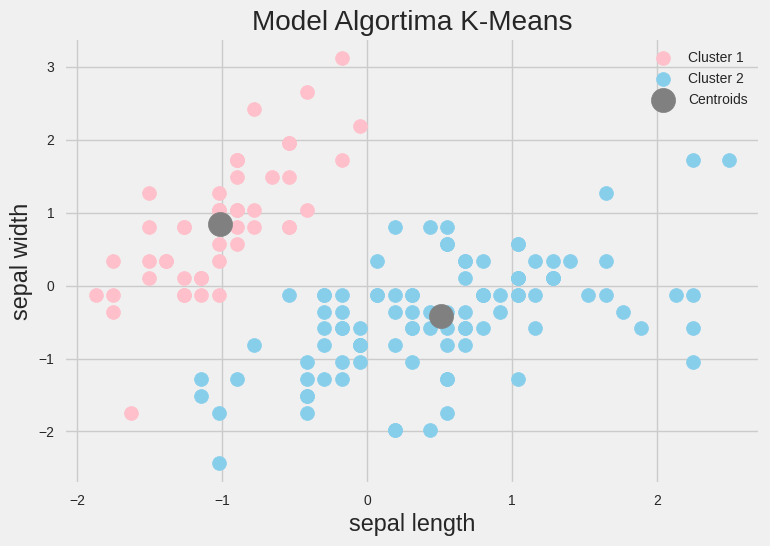

In [54]:
# Buat plot hasil permodelan menggunakan k-means
model1 = KMeans(n_clusters=2, init="k-means++", random_state=42)
y_pred1 = model1.fit_predict(x_scaled)

# Visualisasi Algoritma K-Means
plt.scatter(x_scaled[y_pred1 == 0, 0], x_scaled[y_pred1 == 0, 1],
            s = 100, c = 'pink', label = 'Cluster 1')

plt.scatter(x_scaled[y_pred1 == 1, 0], x_scaled[y_pred1 == 1, 1],
            s = 100, c = 'skyblue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s = 300, c = 'grey', label = 'Centroids')

plt.title('Model Algortima K-Means')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

#### DB-Scan

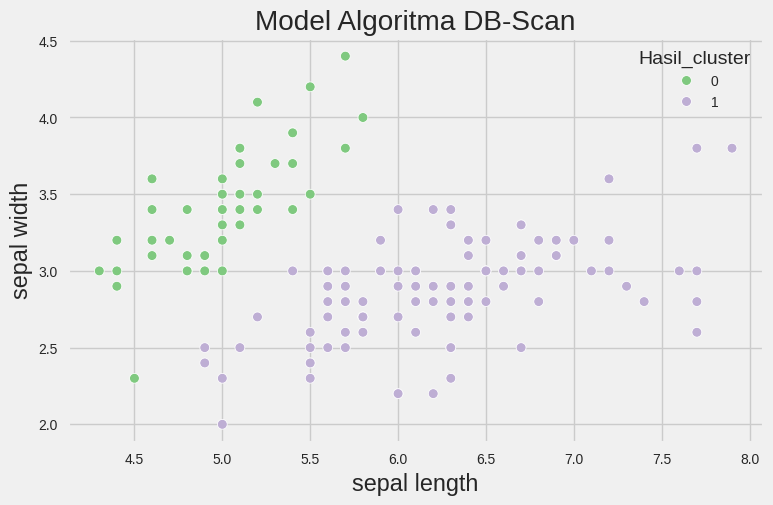

In [55]:
# Buat visualisasi hasil permodelan menggunakan db-scan
plt.figure(figsize=(8,5))
data['Hasil_cluster'] = y_pred1

sns.scatterplot(x = 'sepal length', y = 'sepal width',
                hue = 'Hasil_cluster', data = data, palette = 'Accent', s = 50)
plt.title('Model Algoritma DB-Scan')
plt.show()

### Interpretasi

**K-Means**

Dari hasil scatter plot model K-Means di atas, kita dapat menarik beberapa kesimpulan mengenai distribusi klaster berdasarkan fitur "sepal width" dan "sepal length":

1. **Distribusi Klaster**:
   - **Klaster untuk Sepal Width** memiliki rentang nilai pada sumbu x dari -2 hingga 0, dan pada sumbu y dari 0 hingga 3.
   - **Klaster untuk Sepal Length** memiliki rentang nilai pada sumbu x dari -1 hingga 2, dan pada sumbu y dari -2 hingga 2.
   - Centroi(abu-abu) berada di koordinat (-1, 1), yang menjadi pusat dari kedua klaster.

2. **Analisis Klaster**:
   Data dalam Cluster 1 cenderung lebih dekat dengan centroid, mencerminkan homogenitas data di mana jarak antar data dalam klaster relatif kecil. Artinya, data dalam Cluster 1 memiliki kemiripan fitur yang kuat satu sama lain. Jika dikaitkan dengan contoh bunga iris, Cluster 1 mungkin merepresentasikan bunga dengan bentuk yang lebih lebar dan besar. Sebaliknya, Cluster 2 menunjukkan data yang lebih beragam dengan sebaran yang lebih luas, menunjukkan sifat heterogen. Ini berarti data di Cluster 2 memiliki variasi yang lebih besar, memaksimalkan jarak antar klaster. Dalam konteks bunga iris, Cluster 2 mungkin menggambarkan bunga dengan bentuk yang lebih panjang.

**DB-Scan**

Gambar tersebut menunjukkan hasil visualisasi klastering menggunakan algoritma **DB-Scan** pada dataset yang terdiri dari dua fitur: "sepal length" dan "sepal width." Algoritma ini memisahkan data ke dalam dua klaster berdasarkan kepadatan data, yang ditampilkan melalui scatter plot.

- **Cluster 0** (hijau). Data pada Cluster 0 cenderung berada di bagian atas grafik, dengan nilai "sepal width" yang lebih tinggi, berkisar antara 3.0 hingga 4.5, dan memiliki sebaran "sepal length" yang cukup luas, mulai dari 4.5 hingga 7.0.
- **Cluster 1** (ungu) yang lebih terkonsentrasi di bagian bawah grafik. Cluster 1 menunjukkan data dengan nilai "sepal width" yang lebih rendah, berkisar antara 2.5 hingga 3.5, tetapi memiliki "sepal length" yang lebih panjang, antara 6.0 hingga 8.0.

Dari hasil ini, dapat disimpulkan bahwa algoritma DB-Scan mampu mengidentifikasi dua kelompok data yang berbeda berdasarkan kepadatan titik. **Cluster 0** lebih didominasi oleh data dengan "sepal width" yang lebih lebar dan rentang panjang yang bervariasi, mengindikasikan bunga dengan karakteristik sepal yang lebar. Sebaliknya, **Cluster 1** menunjukkan data dengan "sepal length" yang lebih panjang tetapi lebar yang lebih kecil, mengisyaratkan adanya perbedaan karakteristik pada kelompok ini dibandingkan Cluster 0. Dengan cara ini, DB-Scan dapat memetakan data yang kompleks atau tidak beraturan tanpa perlu menentukan jumlah klaster sebelumnya, membedakan pola secara alami berdasarkan kepadatan data yang terdeteksi dalam ruang fitur.

## 6. Menggunakan matriks evaluasi Silhouette score dan Davies-Bouldin Index, tentukan mana model dengan nilai evaluasi terbaik! Interpretaskanlah hasil matriks evaluasi yang didapat!

In [59]:
# Menghitung Silhouette Score untuk K-Means
silhouette_kmeans = silhouette_score(data_scaled, data['Label_K-Means'])

# Menghitung Silhouette Score untuk DBSCAN
silhouette_dbscan = silhouette_score(data_scaled, data['Label_DB-Scan']) if len(set(data['Label_DB-Scan'])) > 1 else -1  # Menghindari error jika hanya satu cluster

print(f'Silhouette Score K-Means: {silhouette_kmeans}')
print(f'Silhouette Score DBSCAN: {silhouette_dbscan}')

Silhouette Score K-Means: 0.580184463257396
Silhouette Score DBSCAN: 0.13405070485057646


In [60]:
# Menghitung Davies-Bouldin Index untuk K-Means
db_index_kmeans = davies_bouldin_score(data_scaled, data['Label_K-Means'])

# Menghitung Davies-Bouldin Index untuk DBSCAN
db_index_dbscan = davies_bouldin_score(data_scaled, data['Label_DB-Scan']) if len(set(data['Label_DB-Scan'])) > 1 else float('inf')

print(f'Davies-Bouldin Index K-Means: {db_index_kmeans}')
print(f'Davies-Bouldin Index DBSCAN: {db_index_dbscan}')

Davies-Bouldin Index K-Means: 0.5975546650809878
Davies-Bouldin Index DBSCAN: 3.4787424616090363


### Interpretasi


### **1. Silhouette Score**
     - Nilai mendekati 1 menunjukkan bahwa objek dikelompokkan dengan baik ke dalam klasternya.
     - Nilai mendekati -1 menunjukkan bahwa objek lebih baik ditempatkan di klaster yang berbeda.
   
   - **Hasil:**
     - **K-Means**: `0.5081`
     - **DB-Scan**: `0.1346`
   
   **Interpretasi** : Model **K-Means** memiliki Silhouette Score yang lebih tinggi, yaitu `0.5081`, yang berarti klaster yang terbentuk cukup baik, dengan objek-objek berada lebih dekat dengan klaster yang benar. Sebaliknya, DB-Scan memiliki skor yang lebih rendah, yaitu `0.1346`, yang menunjukkan bahwa klaster yang dihasilkan kurang kompak atau ada objek yang mungkin salah dikelompokkan.

### **2. Davies-Bouldin Index**
     - Nilai mendekati 0 menunjukkan klaster yang lebih baik.
     - Nilai yang lebih tinggi menunjukkan klaster yang lebih tumpang tindih atau kurang terpisah dengan baik.
   
   - **Hasil:**
     - **K-Means**: `0.5975`
     - **DB-Scan**: `3.4787`
   
   **Interpretasi** : Nilai Davies-Bouldin Index untuk **K-Means** lebih rendah (`0.5975`) dibandingkan DB-Scan (`3.4787`), menunjukkan bahwa K-Means menghasilkan klaster yang lebih terpisah dengan baik dibandingkan DB-Scan. DB-Scan memiliki nilai yang lebih tinggi, mengindikasikan bahwa klaster yang dihasilkan lebih tumpang tindih atau kurang terisolasi satu sama lain.

### **Kesimpulan Evaluasi**
Berdasarkan dua metrik evaluasi yang digunakan:
   - **K-Means** menunjukkan performa yang lebih baik dibandingkan DB-Scan, dengan **Silhouette Score yang lebih tinggi** dan **Davies-Bouldin Index yang lebih rendah**.
   - **K-Means** menghasilkan klaster yang lebih kompak dan terpisah dengan baik, sedangkan **DB-Scan** menunjukkan adanya kesulitan dalam membentuk klaster yang jelas berdasarkan pola data ini.
  
**K-Means** adalah model yang lebih sesuai untuk dataset ini berdasarkan hasil evaluasi, menunjukkan klaster yang lebih jelas dan lebih terorganisir dibandingkan dengan DB-Scan.